In [ ]:
VIGILATION_API = ''

In [ ]:
metadata_json = '/content/socrata_metadata.json' #Introduzir novos dados

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import json_normalize
import re
from PIL import Image

In [ ]:
!pip install kaggle

from google.colab import files
files.upload() #enviar o arquivo kaggle.json

#antes de importar o dataset nós iremos provisionar o local de armazenamento
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#Alterar a permissão para evitar o aviso durante a partida da ferramenta Kaggle
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

#Aceitar a competição e copiar o endereço da API para o download do dataset
!kaggle datasets download -d city-of-seattle/seattle-traffic-cameras

#Descompactar o arquivo baixado
!unzip \*.zip  && rm *.zip


Saving kaggle.json to kaggle.json
  0% 0.00/8.08k [00:00<?, ?B/s]
100% 8.08k/8.08k [00:00<00:00, 13.9MB/s]
Archive:  seattle-traffic-cameras.zip
  inflating: seattle-traffic-cameras.csv  
  inflating: socrata_metadata.json   


In [ ]:
# importar os pacotes necessários
import pandas as pd

# importar o arquivo
df = pd.read_csv("/content/seattle-traffic-cameras.csv") #aqui você deve especificar o nome do arquivo .csv que deseja importar

# ver 5 as primeiras entradas
df.head()

,OWNERSHIPCD,CAMERALABEL,IMAGEURL,VIDEOURL,WEBURL,XPOS,YPOS,LOCATION
0,SDOT,15th Ave W & W Emerson St,{'url': 'http://www.seattle.gov/trafficcams/im...,rtmp://156.74.125.142:1935/live&file=15_Emerso...,NaN,-122.37612,47.65408,"{'latitude': '47.65408', 'longitude': '-122.37..."
1,SDOT,15th Ave NW & NW 65th St - NS,{'url': 'http://www.seattle.gov/trafficcams/im...,rtmp://156.74.125.142:1935/live&file=15NW_65.s...,NaN,-122.37621,47.67590,"{'latitude': '47.6759', 'longitude': '-122.376..."
2,SDOT,15th Ave NW & NW Market St - NS,{'url': 'http://www.seattle.gov/trafficcams/im...,rtmp://156.74.125.142:1935/live&file=15_Market...,NaN,-122.37631,47.66852,"{'latitude': '47.66852', 'longitude': '-122.37..."
3,SDOT,1st Ave & Denny Way,{'url': 'http://www.seattle.gov/trafficcams/im...,rtmp://156.74.125.142:1935/live&file=1_Denny.s...,NaN,-122.35557,47.61851,"{'latitude': '47.61851', 'longitude': '-122.35..."
4,SDOT,15th Ave NW & NW Leary Way,{'url': 'http://www.seattle.gov/trafficcams/im...,rtmp://156.74.125.142:1935/live&file=15_Leary....,NaN,-122.37593,47.66360,"{'latitude': '47.6636', 'longitude': '-122.375..."


In [19]:
df.columns

Index(['OWNERSHIPCD', 'CAMERALABEL', 'IMAGEURL', 'VIDEOURL', 'WEBURL', 'XPOS',
       'YPOS', 'LOCATION'],
      dtype='object')

In [ ]:
df.shape

(135, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OWNERSHIPCD  135 non-null    object 
 1   CAMERALABEL  135 non-null    object 
 2   IMAGEURL     135 non-null    object 
 3   VIDEOURL     114 non-null    object 
 4   WEBURL       69 non-null     object 
 5   XPOS         135 non-null    float64
 6   YPOS         135 non-null    float64
 7   LOCATION     135 non-null    object 
dtypes: float64(2), object(6)
memory usage: 8.6+ KB


In [ ]:
df.index

RangeIndex(start=0, stop=135, step=1)

In [ ]:
df.count()

OWNERSHIPCD    135
CAMERALABEL    135
IMAGEURL       135
VIDEOURL       114
WEBURL          69
XPOS           135
YPOS           135
LOCATION       135
dtype: int64

In [ ]:
df.isnull().sum()

OWNERSHIPCD     0
CAMERALABEL     0
IMAGEURL        0
VIDEOURL       21
WEBURL         66
XPOS            0
YPOS            0
LOCATION        0
dtype: int64

In [ ]:
df.isnull().sum() / df.shape[0] * 100

OWNERSHIPCD    0.00
CAMERALABEL    0.00
IMAGEURL       0.00
VIDEOURL      15.56
WEBURL        48.89
XPOS           0.00
YPOS           0.00
LOCATION       0.00
dtype: float64

In [ ]:
df_pos = df.fillna({'VIDEOURL': 'N/A', 'WEBURL': 'N/A'})

In [ ]:
for i in df.columns:
  print(f'{i}:{df[i].nunique()}')

OWNERSHIPCD:2
CAMERALABEL:132
IMAGEURL:133
VIDEOURL:115
WEBURL:67
XPOS:132
YPOS:132
LOCATION:135
ENTITY:114


In [ ]:
pd.set_option('display.max_colwidth', 1000)
df_pos['LOCATION'].head()

0    {'latitude': '47.65408', 'longitude': '-122.37612', 'needs_recoding': False}
1     {'latitude': '47.6759', 'longitude': '-122.37621', 'needs_recoding': False}
2    {'latitude': '47.66852', 'longitude': '-122.37631', 'needs_recoding': False}
3    {'latitude': '47.61851', 'longitude': '-122.35557', 'needs_recoding': False}
4     {'latitude': '47.6636', 'longitude': '-122.37593', 'needs_recoding': False}
Name: LOCATION, dtype: object

In [ ]:
df_pos.drop('LOCATION',axis = 1, inplace= True)

In [ ]:
df['VIDEOURL'].head()

0    rtmp://156.74.125.142:1935/live&file=15_Emerson.stream
1       rtmp://156.74.125.142:1935/live&file=15NW_65.stream
2     rtmp://156.74.125.142:1935/live&file=15_Market.stream
3       rtmp://156.74.125.142:1935/live&file=1_Denny.stream
4      rtmp://156.74.125.142:1935/live&file=15_Leary.stream
Name: VIDEOURL, dtype: object

In [ ]:
pd.set_option('display.max_colwidth', 1000)
df['IMAGEURL'].head()

0    {'url': 'http://www.seattle.gov/trafficcams/images/15W_Emerson.jpg'}
1        {'url': 'http://www.seattle.gov/trafficcams/images/15NW_65.jpg'}
2    {'url': 'http://www.seattle.gov/trafficcams/images/15NW_Market.jpg'}
3        {'url': 'http://www.seattle.gov/trafficcams/images/1_Denny.jpg'}
4     {'url': 'http://www.seattle.gov/trafficcams/images/15NW_Leary.jpg'}
Name: IMAGEURL, dtype: object

In [ ]:
df.CAMERALABEL.head()

0          15th Ave W & W Emerson St
1      15th Ave NW & NW 65th St - NS
2    15th Ave NW & NW Market St - NS
3                1st Ave & Denny Way
4         15th Ave NW & NW Leary Way
Name: CAMERALABEL, dtype: object

In [ ]:
def extrair_direcao_cardinal(label):
    direcoes_cardinais = {
        'W': 'West',
        'SW': 'Southwest',
        'SE': 'Southeast',
        'S': 'South',
        'NW': 'Northwest',
        'NE': 'Northeast',
        'N': 'North',
        'E': 'East',
        'North': 'North',
        'South': 'South',
        'East': 'East',
        'West': 'West',
        'Southwest': 'Southwest',
        'Southeast': 'Southeast',
        'Northwest': 'Northwest',
        'Northeast': 'Northeast',
        'Magnolia/Queen Anne': 'Magnolia/Queen Anne',
        'Lake Union': 'Lake Union',
        'Greater Duwamish': 'Greater Duwamish',
        'Downtown': 'Downtown',
        'Delridge': 'Delridge',
        'Central': 'Central',
        'Ballard': 'Ballard'
    }

    match = re.search(r'\b(' + '|'.join(direcoes_cardinais.keys()) + r')\b', label)
    return direcoes_cardinais[match.group(1)] if match else None

# Aplicar a função à coluna "CAMERALABEL" e criar uma nova coluna "DIRECAO_CARDINAL"
df_pos['CARDINAL_DIRECTION'] = df_pos['CAMERALABEL'].apply(extrair_direcao_cardinal)

# Exibir o DataFrame resultante
df_pos.head()


,OWNERSHIPCD,CAMERALABEL,IMAGEURL,VIDEOURL,WEBURL,LONGITUDE,LATITUDE,LOCATION,REGION,CARDINAL_DIRECTION
0,SDOT,15th Ave W & W Emerson St,http://www.seattle.gov/trafficcams/images/15W_...,rtmp://156.74.125.142:1935/live&file=15_Emerso...,N/A,-122.37612,47.65408,"{'latitude': '47.65408', 'longitude': '-122.37...",Seattle,West
1,SDOT,15th Ave NW & NW 65th St - NS,http://www.seattle.gov/trafficcams/images/15NW...,rtmp://156.74.125.142:1935/live&file=15NW_65.s...,N/A,-122.37621,47.67590,"{'latitude': '47.6759', 'longitude': '-122.376...",Seattle,Northwest
2,SDOT,15th Ave NW & NW Market St - NS,http://www.seattle.gov/trafficcams/images/15NW...,rtmp://156.74.125.142:1935/live&file=15_Market...,N/A,-122.37631,47.66852,"{'latitude': '47.66852', 'longitude': '-122.37...",Seattle,Northwest
3,SDOT,1st Ave & Denny Way,http://www.seattle.gov/trafficcams/images/1_De...,rtmp://156.74.125.142:1935/live&file=1_Denny.s...,N/A,-122.35557,47.61851,"{'latitude': '47.61851', 'longitude': '-122.35...",Seattle,None
4,SDOT,15th Ave NW & NW Leary Way,http://www.seattle.gov/trafficcams/images/15NW...,rtmp://156.74.125.142:1935/live&file=15_Leary....,N/A,-122.37593,47.66360,"{'latitude': '47.6636', 'longitude': '-122.375...",Seattle,Northwest


In [ ]:
df_pos.count()

OWNERSHIPCD           135
CAMERALABEL           135
IMAGEURL              135
VIDEOURL              135
WEBURL                135
XPOS                  135
YPOS                  135
CARDINAL_DIRECTION    101
dtype: int64

In [ ]:
df_pos.isnull().sum() / df_pos.shape[0] * 100

OWNERSHIPCD           0.00
CAMERALABEL           0.00
IMAGEURL              0.00
VIDEOURL              0.00
WEBURL                0.00
XPOS                  0.00
YPOS                  0.00
CARDINAL_DIRECTION   25.19
dtype: float64

In [ ]:
df_pos = df_pos.fillna({'CARDINAL_DIRECTION': 'N/A'})

In [ ]:
df_pos = df_pos.rename(columns={'XPOS':'LONGITUDE','YPOS':'LATITUDE'})

In [ ]:
import ast

def extrair_url(dicionario_str):
    try:
        dicionario = ast.literal_eval(dicionario_str)
        return dicionario.get('url', None)
    except (SyntaxError, ValueError):
        return None

df_pos['IMAGEURL'] = df_pos['IMAGEURL'].apply(extrair_url)

In [ ]:
df_pos.head()

,OWNERSHIPCD,CAMERALABEL,IMAGEURL,VIDEOURL,WEBURL,LONGITUDE,LATITUDE,CARDINAL_DIRECTION
0,SDOT,15th Ave W & W Emerson St,http://www.seattle.gov/trafficcams/images/15W_...,rtmp://156.74.125.142:1935/live&file=15_Emerso...,N/A,-122.37612,47.65408,West
1,SDOT,15th Ave NW & NW 65th St - NS,http://www.seattle.gov/trafficcams/images/15NW...,rtmp://156.74.125.142:1935/live&file=15NW_65.s...,N/A,-122.37621,47.67590,Northwest
2,SDOT,15th Ave NW & NW Market St - NS,http://www.seattle.gov/trafficcams/images/15NW...,rtmp://156.74.125.142:1935/live&file=15_Market...,N/A,-122.37631,47.66852,Northwest
3,SDOT,1st Ave & Denny Way,http://www.seattle.gov/trafficcams/images/1_De...,rtmp://156.74.125.142:1935/live&file=1_Denny.s...,N/A,-122.35557,47.61851,None
4,SDOT,15th Ave NW & NW Leary Way,http://www.seattle.gov/trafficcams/images/15NW...,rtmp://156.74.125.142:1935/live&file=15_Leary....,N/A,-122.37593,47.66360,Northwest


In [ ]:
df_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OWNERSHIPCD  135 non-null    object 
 1   CAMERALABEL  135 non-null    object 
 2   IMAGEURL     135 non-null    object 
 3   VIDEOURL     135 non-null    object 
 4   WEBURL       135 non-null    object 
 5   LONGITUDE    135 non-null    float64
 6   LATITUDE     135 non-null    float64
 7   LOCATION     135 non-null    object 
dtypes: float64(2), object(6)
memory usage: 8.6+ KB


In [74]:
# Extract the letters 'S' and 'WS' into separate columns
df_pos[['Letra_S', 'Letras_WS']] = df_pos['OWNERSHIPCD'].str.extract(r'(?P<Letra_S>S|)(?P<Letras_WS>WS|)')

# Combine the columns into a single 'REGION' column
df_pos['REGION'] = df_pos['Letra_S'].fillna('') + df_pos['Letras_WS'].fillna('')

# Drop the temporary columns
df_pos.drop(columns=['Letra_S', 'Letras_WS'], inplace=True)

# Replace 'S' with 'Seattle' and 'WS' with 'Washington'
df_pos['REGION'] = df_pos['REGION'].replace({'S': 'Seattle', 'WS': 'Washington'})

In [77]:
df_pos.head()

,OWNERSHIPCD,CAMERALABEL,IMAGEURL,VIDEOURL,WEBURL,LONGITUDE,LATITUDE,REGION,CARDINAL_DIRECTION
0,SDOT,15th Ave W & W Emerson St,http://www.seattle.gov/trafficcams/images/15W_...,rtmp://156.74.125.142:1935/live&file=15_Emerso...,N/A,-122.37612,47.65408,Seattle,West
1,SDOT,15th Ave NW & NW 65th St - NS,http://www.seattle.gov/trafficcams/images/15NW...,rtmp://156.74.125.142:1935/live&file=15NW_65.s...,N/A,-122.37621,47.67590,Seattle,Northwest
2,SDOT,15th Ave NW & NW Market St - NS,http://www.seattle.gov/trafficcams/images/15NW...,rtmp://156.74.125.142:1935/live&file=15_Market...,N/A,-122.37631,47.66852,Seattle,Northwest
3,SDOT,1st Ave & Denny Way,http://www.seattle.gov/trafficcams/images/1_De...,rtmp://156.74.125.142:1935/live&file=1_Denny.s...,N/A,-122.35557,47.61851,Seattle,None
4,SDOT,15th Ave NW & NW Leary Way,http://www.seattle.gov/trafficcams/images/15NW...,rtmp://156.74.125.142:1935/live&file=15_Leary....,N/A,-122.37593,47.66360,Seattle,Northwest


In [ ]:
cont_strings = df_pos['OWNERSHIPCD'].value_counts()
print(cont_strings)

SDOT     114
WSDOT     21
Name: OWNERSHIPCD, dtype: int64


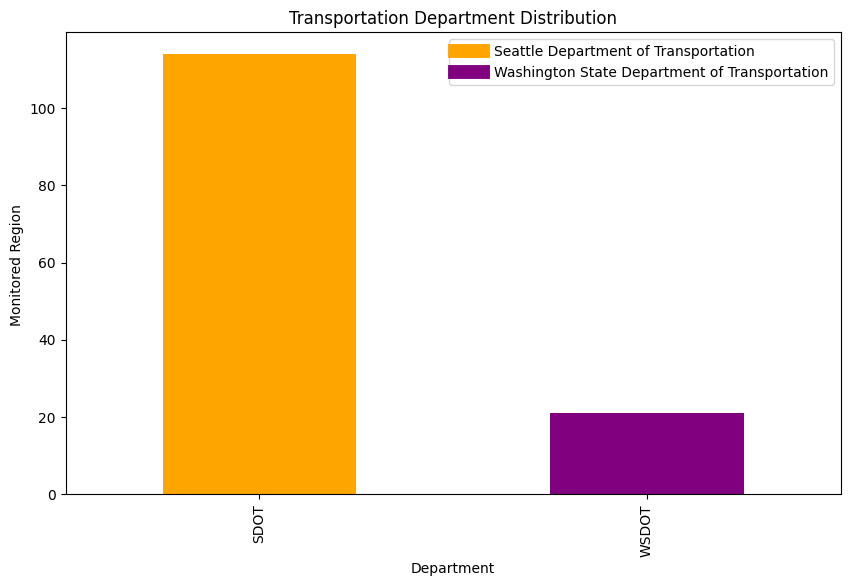

In [ ]:
ownership = df_pos['OWNERSHIPCD'].value_counts()
plt.figure(figsize=(10, 6))
bar_chart = ownership.plot(kind='bar', color=['orange', 'purple'])
plt.title('Transportation Department Distribution')
plt.xlabel('Department')
plt.ylabel('Monitored Region ')
subtitle = ['Seattle Department of Transportation', 'Washington State Department of Transportation']
legend_labels = [plt.Line2D([0], [0], color='orange', lw=10),
                 plt.Line2D([0], [0], color='purple', lw=10)]
plt.legend(legend_labels, subtitle, loc='upper right')
plt.show()

In [ ]:
df_pos['CARDINAL_DIRECTION'].value_counts()

South        31
North        20
East         18
Northeast    17
West          8
Southwest     7
Northwest     6
Name: CARDINAL_DIRECTION, dtype: int64

In [ ]:
df_pos['CARDINAL_DIRECTION'].value_counts().sum()

107

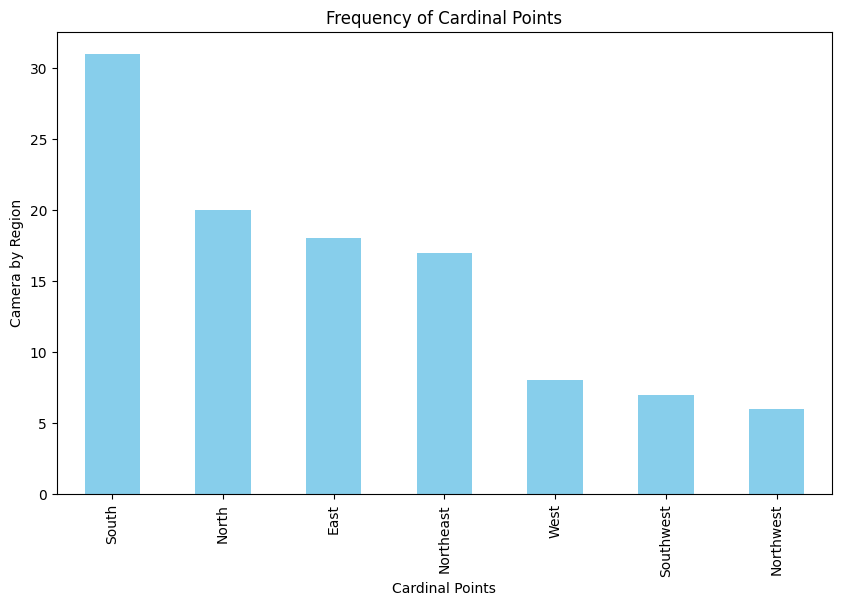

In [ ]:
frequencia_cardinais = df_pos['CARDINAL_DIRECTION'].value_counts()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
frequencia_cardinais.plot(kind='bar', color='skyblue')
plt.title('Frequency of Cardinal Points')
plt.xlabel('Cardinal Points')
plt.ylabel('Camera by Region')
plt.show()

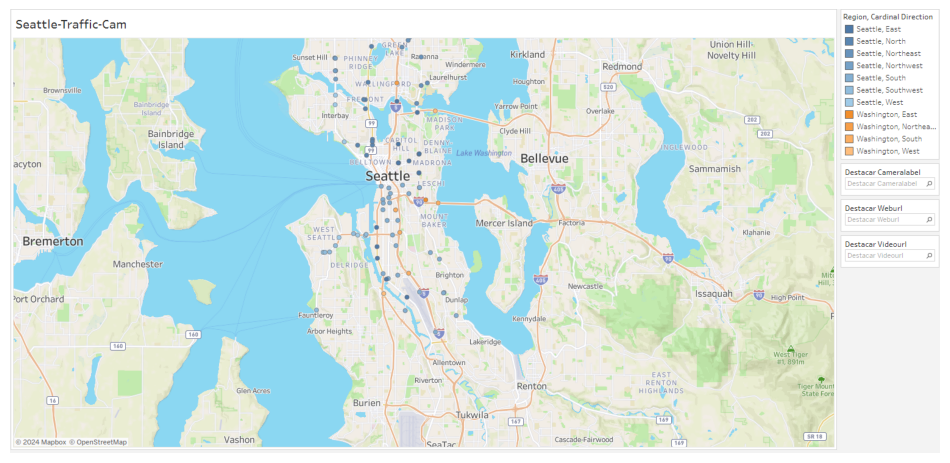

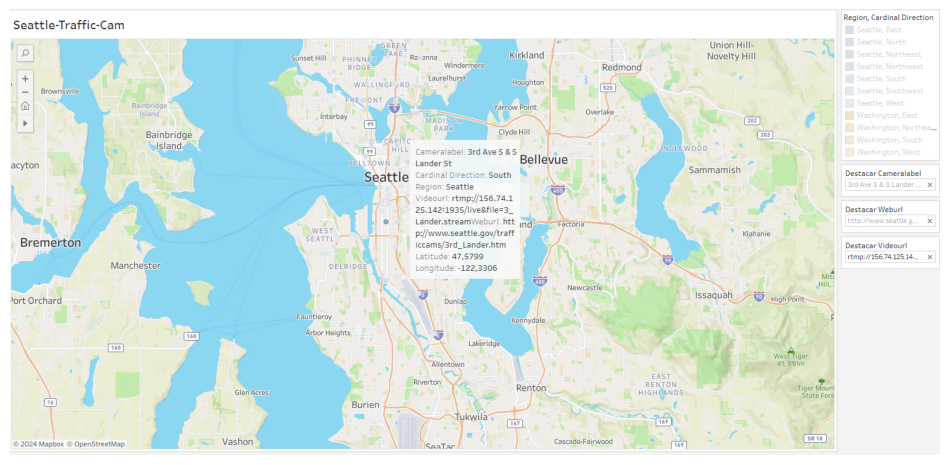

In [88]:
# @title Visualização do Mapa
# Ferramenta para visualização: Tableau
def exibir_imagem(imagem):
    plt.figure(figsize=(12, 24))
    plt.imshow(imagem)
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    # Lista de caminhos de imagens
    caminhos_imagens = ['/content/archives_png/photo-cam_0000.png',
                        '/content/archives_png/photo-cam_0001.png',
                       ]

    try:
        # Iterar sobre cada caminho de imagem
        for caminho_imagem in caminhos_imagens:
            imagem = Image.open(caminho_imagem)
            exibir_imagem(imagem)

    except Exception as e:
        print(f"Ocorreu um erro: {e}")


In [ ]:
df_pos.to_csv('TR-seattle_traffic-cameras.csv', index= False, sep ='\t') # TR(Treated)